## Datenimport & Modulimport

In [124]:
#Einlesen des Dataframes aus Byte-Stream (Pickle) Format
import pickle
import pandas as pd
import numpy as np

#Plotting Libraries
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [79]:
StarWars = pd.read_pickle("StarWars_Gesamt.pckl")
StarWars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_id                  28598 non-null  object        
 1   titel                    28598 non-null  object        
 2   jahr                     28598 non-null  object        
 3   kategorie                28598 non-null  object        
 4   review_id                28598 non-null  object        
 5   username                 28598 non-null  object        
 6   gesamtbewertung          28598 non-null  float64       
 7   rating                   28598 non-null  float64       
 8   date                     28598 non-null  datetime64[ns]
 9   review_caption           28598 non-null  object        
 10  bewertung                28598 non-null  object        
 11  textblob_polaritaet      28598 non-null  float64       
 12  textblob_subjektivitaet  28598 n

In [81]:
StarWars.titel.value_counts()

titel
Star Wars: Episode IX - Der Aufstieg Skywalkers         6064
Star Wars: Episode VIII - Die letzten Jedi              4253
Star Wars: Episode I - Die dunkle Bedrohung             2783
Star Wars: Episode II - Angriff der Klonkrieger         2545
Star Wars: Episode VII - Das Erwachen der Macht         2449
Star Wars: Episode III - Die Rache der Sith             2206
Solo: A Star Wars Story                                 2136
Star Wars: Episode IV - Krieg der Sterne                1564
Star Wars: Rogue One                                    1255
Star Wars: Episode V - Das Imperium schlägt zurück       995
Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter     618
Star Wars: The Clone Wars                                523
Star Wars: The Bad Batch                                 255
The Star Wars Holiday Special                            212
Star Wars: Visions                                       191
Star Wars: Resistance                                    167
Star Wars Rebels  

## Verteilung Sentiments (Boxplot)

In [82]:
StarWars_sorted = StarWars.sort_values(by=['jahr'])

colors = px.colors.sequential.Reds[::-1]
fig = px.box(StarWars_sorted, x='vader_compound', y='titel',
             color_discrete_sequence=colors,
             title="Boxplot: VADER Compound nach Film (absteigend nach Erscheinungsjahr)",
             labels={'vader_compound': 'VADER Compound', 'titel': 'Titel'},
             width=1200, height=800)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    xaxis_title='VADER Compound',
    yaxis_title='Titel',
    title_font_size=30,
    title_x = 0.5,
    xaxis=dict(title_font=dict(size=22)),
    yaxis=dict(title_font=dict(size=22))
)

fig.show()

### Analyse VADER Compound Ausreißer

In [83]:
ausreißer_vader_VI = StarWars[(StarWars['titel'] == 'Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter') & (StarWars['vader_compound'] < -0.75)]
type(ausreißer_vader_VI)


pandas.core.frame.DataFrame

In [84]:
ausreißer_vader_VI['bewertung'].iloc[:1]

19639    Luke Skywalker is established as Jesus. Ewoks are the Christians. Han Solo is the Saul-to-Paul convert. Star Wars 7 - 9, logically, should habe been the Holy Crusades. The dark-green Ewoks forest in the final battle already sets the scene for medieval style follow-ups. The following might sound sarcastic but it's not: Medieval style poverty, hand baked dirty bread, and constantly coughing people, are exactly what the rebels had in mind. Star Wars already has Jedis, so why not add wizards, monks, soothsayers, Robin Hoods, foul warlords, Siege equipment, cogney accent, a variety of laser swords ...
Name: bewertung, dtype: object

In [85]:
ausreiser_vader_VI = StarWars[(StarWars['titel'] == 'Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter')]
ausreiser_vader_V = StarWars[(StarWars['titel'] == 'Star Wars: Episode IV - Krieg der Sterne')]
                              


### Textblob Boxplot

In [86]:
StarWars_sorted = StarWars.sort_values(by=['jahr'])

colors = px.colors.sequential.Reds[::-1]
fig = px.box(StarWars_sorted, x='textblob_polaritaet', y='titel',
             color_discrete_sequence=colors,
             title="Boxplot: Textblob Polarität nach Film (absteigend nach Erscheinungsjahr)",
             labels={'vader_compound': 'VADER Compound', 'titel': 'Titel'},
             width=1200, height=800)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    xaxis_title='Textblob Polarität',
    yaxis_title='Titel',
    title_font_size=30,
    title_x = 0.5,
    xaxis=dict(title_font=dict(size=22)),
    yaxis=dict(title_font=dict(size=22))
)

fig.show()

In [87]:
StarWars.groupby('titel')['textblob_polaritaet'].describe()

count      mean  \
titel                                                                    
Solo: A Star Wars Story                               2136.0  0.187893   
Star Wars Rebels                                       165.0  0.174675   
Star Wars: Clone Wars                                   51.0  0.217133   
Star Wars: Episode I - Die dunkle Bedrohung           2783.0  0.149525   
Star Wars: Episode II - Angriff der Klonkrieger       2545.0  0.145067   
Star Wars: Episode III - Die Rache der Sith           2206.0  0.165927   
Star Wars: Episode IV - Krieg der Sterne              1564.0  0.237000   
Star Wars: Episode IX - Der Aufstieg Skywalkers       6064.0  0.133792   
Star Wars: Episode V - Das Imperium schlägt zurück     995.0  0.280605   
Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter   618.0  0.206442   
Star Wars: Episode VII - Das Erwachen der Macht       2449.0  0.139777   
Star Wars: Episode VIII - Die letzten Jedi            4253.0  0.047714   
Star Wars: Ewoks - Kampf um Endor                       40.0  0.093088   
Star Wars: Ewoks - Karawane der Tapferen                37.0  0.156596   
Star Wars: Geschichten der Jedi                         89.0  0.225620   
Star Wars: Resistance                                  167.0  0.059376   
Star Wars: Rogue One                                  1255.0  0.196643   
Star Wars: The Bad Batch                               255.0  0.119683   
Star Wars: The Clone Wars                              523.0  0.193497   
Star Wars: Visions                                     191.0  0.167387   
The Star Wars Holiday Special                          212.0  0.033411   

                                                           std       min  \
titel                                                                      
Solo: A Star Wars Story                               0.200723 -1.000000   
Star Wars Rebels                                      0.161349 -0.270000   
Star Wars: Clone Wars                                 0.164789 -0.150000   
Star Wars: Episode I - Die dunkle Bedrohung           0.160596 -1.000000   
Star Wars: Episode II - Angriff der Klonkrieger       0.165716 -0.725000   
Star Wars: Episode III - Die Rache der Sith           0.162367 -1.000000   
Star Wars: Episode IV - Krieg der Sterne              0.178812 -1.000000   
Star Wars: Episode IX - Der Aufstieg Skywalkers       0.237724 -1.000000   
Star Wars: Episode V - Das Imperium schlägt zurück    0.182093 -0.700000   
Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter  0.172955 -0.475000   
Star Wars: Episode VII - Das Erwachen der Macht       0.158150 -1.000000   
Star Wars: Episode VIII - Die letzten Jedi            0.239339 -1.000000   
Star Wars: Ewoks - Kampf um Endor                     0.164594 -0.430556   
Star Wars: Ewoks - Karawane der Tapferen              0.144806 -0.098714   
Star Wars: Geschichten der Jedi                       0.123695 -0.107071   
Star Wars: Resistance                                 0.218708 -1.000000   
Star Wars: Rogue One                                  0.181435 -1.000000   
Star Wars: The Bad Batch                              0.223775 -0.700000   
Star Wars: The Clone Wars                             0.186904 -0.625000   
Star Wars: Visions                                    0.192596 -0.666667   
The Star Wars Holiday Special                         0.168344 -0.700000   

                                                           25%       50%  \
titel                                                                      
Solo: A Star Wars Story                               0.080952  0.187500   
Star Wars Rebels                                      0.078704  0.177865   
Star Wars: Clone Wars                                 0.115000  0.220992   
Star Wars: Episode I - Die dunkle Bedrohung           0.062882  0.150000   
Star Wars: Episode II - Angriff der Klonkrieger       0.051158  0.147005   
Star Wars: Episode III - Die Rache der Sith           0.075334  0.15497

In [88]:
StarWars.describe()

gesamtbewertung        rating                           date  \
count     28598.000000  28598.000000                          28598   
mean          7.065361      6.425344  2014-10-22 05:40:38.352332288   
min           2.200000      1.000000            1998-07-29 00:00:00   
25%           6.500000      4.000000            2007-02-23 00:00:00   
50%           6.900000      7.000000            2018-04-29 12:00:00   
75%           7.800000      9.000000            2019-12-24 00:00:00   
max           8.700000     10.000000            2024-02-01 00:00:00   
std           0.862468      3.217757                            NaN   

       textblob_polaritaet  textblob_subjektivitaet     vader_neg  \
count         28598.000000             28598.000000  28598.000000   
mean              0.146292                 0.535791      0.119722   
min              -1.000000                 0.000000      0.000000   
25%               0.044321                 0.474049      0.071000   
50%               0.151923                 0.532993      0.109000   
75%               0.255556                 0.597222      0.155000   
max               1.000000                 1.000000      1.000000   
std               0.207074                 0.122846      0.077119   

          vader_neu     vader_pos  vader_compound   roberta_neg   roberta_neu  \
count  28598.000000  28598.000000    28598.000000  28598.000000  28598.000000   
mean       0.716598      0.163687        0.285291      0.330102      0.195646   
min        0.000000      0.000000       -0.999700      0.001585      0.005363   
25%        0.668000      0.109000       -0.563450      0.012677      0.057151   
50%        0.724000      0.154000        0.709600      0.140254      0.143796   
75%        0.775000      0.206000        0.953900      0.695242      0.294684   
max        1.000000      0.910000        0.999900      0.965664      0.939805   
std        0.092353      0.087420        0.764238      0.354094      0.171529   

        roberta_pos  
count  28598.000000  
mean       0.474252  
min        0.004026  
25%        0.045708  
50%        0.445576  
75%        0.909465  
max        0.992091  
std        0.394544

In [89]:
StarWars[['textblob_polaritaet','textblob_subjektivitaet']].median()

textblob_polaritaet        0.151923
textblob_subjektivitaet    0.532993
dtype: float64

## Normalisation

In [90]:
normalized = StarWars.loc[:,['titel','rating', 'textblob_polaritaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']]

def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = ((column - min_val) / (max_val - min_val)) * 10
    return normalized_column

normalized['normalized_textblob'] = min_max_normalize(normalized['textblob_polaritaet'])

normalized['normalized_vader_compound'] = min_max_normalize(normalized['vader_compound'])

normalized['normalized_roberta_neg'] = min_max_normalize(normalized['roberta_neg'])
normalized['normalized_roberta_neu'] = min_max_normalize(normalized['roberta_neu'])
normalized['normalized_roberta_pos'] = min_max_normalize(normalized['roberta_pos'])


normalized.groupby('titel')[['normalized_textblob','normalized_vader_compound','normalized_roberta_neg','normalized_roberta_neu','normalized_roberta_pos']].mean().head()


normalized_textblob  \
titel                                                                  
Solo: A Star Wars Story                                     5.939463   
Star Wars Rebels                                            5.873374   
Star Wars: Clone Wars                                       6.085664   
Star Wars: Episode I - Die dunkle Bedrohung                 5.747623   
Star Wars: Episode II - Angriff der Klonkrieger             5.725334   

                                                 normalized_vader_compound  \
titel                                                                        
Solo: A Star Wars Story                                           7.242176   
Star Wars Rebels                                                  5.982687   
Star Wars: Clone Wars                                             6.811480   
Star Wars: Episode I - Die dunkle Bedrohung                       6.594919   
Star Wars: Episode II - Angriff der Klonkrieger                   6.794548   

                                                 normalized_roberta_neg  \
titel                                                                     
Solo: A Star Wars Story                                        2.492944   
Star Wars Rebels                                               3.004743   
Star Wars: Clone Wars                                          1.910363   
Star Wars: Episode I - Die dunkle Bedrohung                    3.218916   
Star Wars: Episode II - Angriff der Klonkrieger                3.232499   

                                                 normalized_roberta_neu  \
titel                                                                     
Solo: A Star Wars Story                                        1.970566   
Star Wars Rebels                                               2.068505   
Star Wars: Clone Wars                                          2.373105   
Star Wars: Episode I - Die dunkle Bedrohung                    2.253858   
Star Wars: Episode II - Angriff der Klonkrieger                2.130571   

                                                 normalized_roberta_pos  
titel                                                                    
Solo: A Star Wars Story                                        5.713671  
Star Wars Rebels                                               5.121672  
Star Wars: Clone Wars                                          5.901416  
Star Wars: Episode I - Die dunkle Bedrohung                    4.737405  
Star Wars: Episode II - Angriff der Klonkrieger                4.840748

## Analyse Filme & Ratings

### Nach Kategorie

In [91]:
anzahl_kat = StarWars.kategorie.value_counts()

fig = px.bar(StarWars.groupby('kategorie')['rating'].mean().reset_index(),
             x='kategorie',
             y= anzahl_kat.values,
             color='rating',
             color_continuous_scale='Reds')

fig.update_yaxes(title_text='Anzahl Ratings für Filmkategorie')
fig.update_layout(title='Durchschnittliches Rating für Filmkategorie', font=dict(size=16),
                  title_x=0.5,
                  title_y=0.95,
                  xaxis=dict(tickfont=dict(family='Arial', size=14)),  # Set x-axis tick font properties
                  yaxis=dict(tickfont=dict(family='Arial', size=12)),
                  plot_bgcolor='rgba(0,0,0,0)'  # Set the plot background color to transparent
                  )

fig.show()


In [92]:
dF_pie = StarWars[['titel','kategorie']].drop_duplicates()['kategorie'].value_counts()
df_pie = pd.DataFrame({'values': df_pie.values, 'kategorie': df_pie.index})

ValueError: Per-column arrays must each be 1-dimensional

In [93]:
type(df_pie)

pandas.core.frame.DataFrame

In [94]:
fig = px.pie(df_pie,
             values='values',
             names='kategorie',
             labels='kategorie',  # Display the category labels as text
             color_discrete_sequence=colors,
             title='Verteilung der Filmkategorien',
             width=800, height=500)

# Update layout
fig.update_layout(font=dict(size=16),
                  title_x=0.5,
                  title_y=0.95,
                  plot_bgcolor='rgba(0,0,0,0)'  # Set the plot background color to transparent
                  )
fig.update_traces(textinfo='value')

# Show plot
fig.show()

### Beispiele für Tabelle mit verschiedenen Ratings

In [95]:
StarWars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_id                  28598 non-null  object        
 1   titel                    28598 non-null  object        
 2   jahr                     28598 non-null  object        
 3   kategorie                28598 non-null  object        
 4   review_id                28598 non-null  object        
 5   username                 28598 non-null  object        
 6   gesamtbewertung          28598 non-null  float64       
 7   rating                   28598 non-null  float64       
 8   date                     28598 non-null  datetime64[ns]
 9   review_caption           28598 non-null  object        
 10  bewertung                28598 non-null  object        
 11  textblob_polaritaet      28598 non-null  float64       
 12  textblob_subjektivitaet  28598 n

In [96]:
beispiel_rows = ["rw8027959","rw7757717","rw8088475"]
beispiel_df = StarWars.loc[StarWars['review_id'].isin(beispiel_rows)]
beispiel_df = beispiel_df.loc[:, ['titel','review_caption','rating','bewertung','textblob_polaritaet','textblob_subjektivitaet','vader_compound','roberta_neg','roberta_neu','roberta_pos']]
beispiel_df


titel  \
130  Star Wars: Rogue One   
135  Star Wars: Rogue One   
142  Star Wars: Rogue One   

                                                                                                                                                                review_caption  \
130                                                                                                                                         Could have been an exciting story.   
135                                                                                                                                                       worthless money made   
142  Rogue One is a prequel to A New Hope that tells the reality of war with a terrific cast of characters, there's also plenty of tension and suspension - My Ultimate Review   

     rating  \
130     5.0   
135     1.0   
142    10.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [97]:
pd.set_option('display.max_columns', None)
for line in beispiel_df['bewertung']:
    print(line)
    print("-------------------------------")

This could have been an exciting story given that in the original Star Wars there was some mystery and build up behind the stealing of the plans and that's what this should have been. It should have been a journey and a race against time between the Rebellion and the Empire. Maybe even make it Star Wars' version of The Dirty Dozen. But sadly it wasn't. It takes too long to get to the main point of the story which is to steal the plans. Speaking of that the whole Galen Erso plot totally negates to me what happened in Star Wars. The idea was to analyze the plans to see if there is a weakness and if there was a way to destroy the Death Star. However Galen done that for them so there was no point to trying to see if they could destroy the Death Star because they knew they could with the right shot. By doing that you took away the suspense of whether or not the Rebellion could triumph. All in all what could have been a great suspenseful story was just average.
------------------------------

In [98]:
StarWars_titel = StarWars.loc[StarWars['titel'] == "Star Wars: Episode IX - Der Aufstieg Skywalkers"]

random_rows2 = pd.DataFrame(columns =StarWars.columns)
versch_ratings = [9, 5, 1]
for rating in versch_ratings:
    filtered_StarWars_titel = StarWars_titel[StarWars_titel['rating'] == rating]
    random_row = filtered_StarWars_titel.sample(n=1)
    random_rows2 = pd.concat([random_rows2, random_row], ignore_index=True)
    
    #random_rows = random_rows.append(random_row)
    #random_rows.loc[len(random_rows)] = random_row


pd.set_option('display.max_colwidth', None)
random_rows2 = random_rows2.loc[:, ['titel','review_caption','rating','bewertung','textblob_polaritaet','vader_compound','roberta_neg','roberta_neu','roberta_pos']]
random_rows2

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_10036\1206832729.py:8: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



titel  \
0  Star Wars: Episode IX - Der Aufstieg Skywalkers   
1  Star Wars: Episode IX - Der Aufstieg Skywalkers   
2  Star Wars: Episode IX - Der Aufstieg Skywalkers   

                       review_caption  rating  \
0                  Surprisingly Great     9.0   
1  Disappointing end to a bad trilogy     5.0   
2                       Disappointing     1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     bewertung  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           I saw all the reviews that said it was crap.I loved the first three films of the Star Wars saga, Loved them.\nThe rest were weak.""The Rise of Skywalker" was F'n great.\nThe End.   
1  What is there left to say?Not content with a silly premise, we have a movie with no story, just a series of events stitched together.\nAnd when he could, Abrams added characters whose only role was to tick the politically correct gender diversity box.\nAnd apparently the Jedi and Sith can do magic. Who knew? But it certainly solves insurmountable problems when you start to have god-like powers.And the final scene? Bleh. Completely out of place and completely meaningless.This movie will be taught at universities and writing courses everywhere as an example of lazy screen writing, and lazy directing.It gets 5 stars for being slightly better than the Force Awakens, and for being infinitely better than the steaming pile of garbage called the Last Jedi. A movie so bad, the Rise of Skywalker decides to ignore its existence. You can actually go from the first movie to the third with very little confusion.Worth watching just to say you did, with nothing else to recommend it.Update: just finished the 7th season of the Clone Wars. If only this trilogy was as good, with Ahsoka Tano as the main character, instead of Mary Sue.   
2                                                                                                                                                                                                                        

In [142]:
df_beispiele = pd.read_pickle("Bewertungs_beispiele.pckl")

In [143]:
df_beispiele

review_caption  rating  \
0                                             Loved It     9.0   
1                                          Pretty good     5.0   
2  at least the prequels gave us JarJar and sand jokes     1.0   

                                                                                                                                                                                                                                          bewertung  \
0                                                                                                                                         Forget all the negative reactions around , go see it for yourself, really enjoyed it from a lifelong fan.   
1  I have my flaws with the movie little gripes here and there but nothing that makes me hate the film. My biggest problem is the same sex kiss at the end. There is no need to pander to the LGBTQ community this is Star wars not a political add   
2                                                                                                        What did the sequels do exactly?\nit doesn't feel like they added one bit to the SW universe.\nDisney milking this cow till it drops dead.   

   textblob_polaritaet  vader_compound  roberta_neg  roberta_neu  roberta_pos  
0             0.033333          0.0754     0.022192     0.081025     0.896783  
1            -0.246875         -0.9274     0.845521     0.142663     0.011816  
2            -0.027778         -0.7514     0.858847     0.133127     0.008025

## Korrelation

In [99]:
StarWars.titel.nunique()

21

In [100]:
StarWars[['rating','vader_compound']].corr(method='pearson')

rating  vader_compound
rating          1.000000        0.463062
vader_compound  0.463062        1.000000

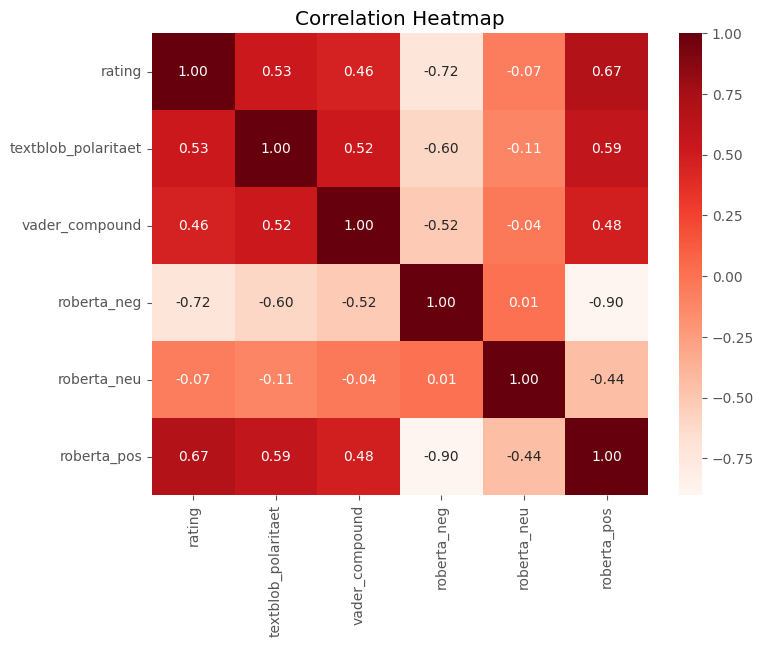

In [101]:
#correlation_matrix = StarWars[['rating', 'textblob_polaritaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']].corr()
correlation_matrix = StarWars[['rating', 'textblob_polaritaet','vader_compound','roberta_neg','roberta_neu','roberta_pos']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### Korrelation Vader zu Rating

In [102]:
#Korrelation Vader zu Rating
corr_vader_rating_nach_titel = StarWars.loc[:, ['titel','rating','vader_compound']]
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.groupby('titel')[['rating','vader_compound']].corr()

#selektiere nur jede Zweite Zeile in der Korrelation vorhanden ist (vermeiden der Korrelationsmatrizzen)
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.iloc[::2][['vader_compound']].reset_index().drop(columns=['level_1'])
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.rename(columns={'vader_compound':'vader_compound_corr'})
#Nach absteigendem Vader / Rating Korrelation sortieren
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.sort_values(by=['vader_compound_corr'], ascending=False)
corr_vader_rating_nach_titel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 14
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titel                21 non-null     object 
 1   vader_compound_corr  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [103]:
corr_vader_rating_nach_titel

titel  vader_compound_corr
1                                       Star Wars Rebels             0.533168
2                                  Star Wars: Clone Wars             0.525000
10       Star Wars: Episode VII - Das Erwachen der Macht             0.520218
12                     Star Wars: Ewoks - Kampf um Endor             0.498807
7        Star Wars: Episode IX - Der Aufstieg Skywalkers             0.487842
11            Star Wars: Episode VIII - Die letzten Jedi             0.479174
15                                 Star Wars: Resistance             0.476190
18                             Star Wars: The Clone Wars             0.459598
0                                Solo: A Star Wars Story             0.403383
20                         The Star Wars Holiday Special             0.399123
4        Star Wars: Episode II - Angriff der Klonkrieger             0.389558
19                                    Star Wars: Visions             0.376403
16                                  Star Wars: Rogue One             0.368974
3            Star Wars: Episode I - Die dunkle Bedrohung             0.356527
13              Star Wars: Ewoks - Karawane der Tapferen             0.323976
17                              Star Wars: The Bad Batch             0.321167
5            Star Wars: Episode III - Die Rache der Sith             0.302701
9   Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter             0.286537
6               Star Wars: Episode IV - Krieg der Sterne             0.223392
8     Star Wars: Episode V - Das Imperium schlägt zurück             0.168195
14                       Star Wars: Geschichten der Jedi             0.111975

In [104]:
#Berechnun der wirklichen Gesamtbewertung als rating
df_gesamtbewertung = pd.DataFrame(StarWars.groupby('titel')['rating'].mean()).reset_index()


# #Berechnung Anzahl Rezessionen je Film
anzahl_rez_titel = StarWars['titel'].value_counts().to_frame().reset_index()

to_merge_df = StarWars[['titel','jahr','gesamtbewertung']].drop_duplicates()
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, to_merge_df, on = 'titel', how = 'left')
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, df_gesamtbewertung, on='titel', how = 'left')
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, anzahl_rez_titel, on='titel', how = 'left')

#Mergen der durschnittsbewertung vom vader_compound score je Film
mean_score_vader_compound = StarWars.groupby('titel')['vader_compound'].mean().sort_values(ascending=False)
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, mean_score_vader_compound, on = 'titel', how ='left')


#Entfernen des fälschlicherweise reingekommen doppelten Wertes "Star Wars: CLone Wars"
corr_vader_rating_nach_titel['titel'].drop_duplicates(inplace=True)
corr_vader_rating_nach_titel.drop(8, inplace=True)

In [105]:
corr_vader_rating_nach_titel.titel.count()

21

In [106]:
print(corr_vader_rating_nach_titel.loc[corr_vader_rating_nach_titel['vader_compound'].idxmin()])
print(corr_vader_rating_nach_titel.loc[corr_vader_rating_nach_titel['vader_compound'].idxmax()])

titel                  Star Wars: Resistance
vader_compound_corr                  0.47619
jahr                                    2018
gesamtbewertung                          5.3
rating                              4.449102
count                                    167
vader_compound                     -0.144893
Name: 6, dtype: object
titel                  Star Wars: Episode V - Das Imperium schlägt zurück
vader_compound_corr                                              0.168195
jahr                                                                 1980
gesamtbewertung                                                       8.7
rating                                                           9.244221
count                                                                 995
vader_compound                                                   0.659216
Name: 20, dtype: object


In [107]:
corr_vader_rating_nach_titel

titel  vader_compound_corr  \
0                                       Star Wars Rebels             0.533168   
1                                  Star Wars: Clone Wars             0.525000   
2        Star Wars: Episode VII - Das Erwachen der Macht             0.520218   
3                      Star Wars: Ewoks - Kampf um Endor             0.498807   
4        Star Wars: Episode IX - Der Aufstieg Skywalkers             0.487842   
5             Star Wars: Episode VIII - Die letzten Jedi             0.479174   
6                                  Star Wars: Resistance             0.476190   
7                              Star Wars: The Clone Wars             0.459598   
9                                Solo: A Star Wars Story             0.403383   
10                         The Star Wars Holiday Special             0.399123   
11       Star Wars: Episode II - Angriff der Klonkrieger             0.389558   
12                                    Star Wars: Visions             0.376403   
13                                  Star Wars: Rogue One             0.368974   
14           Star Wars: Episode I - Die dunkle Bedrohung             0.356527   
15              Star Wars: Ewoks - Karawane der Tapferen             0.323976   
16                              Star Wars: The Bad Batch             0.321167   
17           Star Wars: Episode III - Die Rache der Sith             0.302701   
18  Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter             0.286537   
19              Star Wars: Episode IV - Krieg der Sterne             0.223392   
20    Star Wars: Episode V - Das Imperium schlägt zurück             0.168195   
21                       Star Wars: Geschichten der Jedi             0.111975   

    jahr  gesamtbewertung    rating  count  vader_compound  
0   2014              8.1  6.872727    165        0.196598  
1   2003              7.8  7.588235     51        0.362324  
2   2015              7.8  6.133524   2449        0.369332  
3   1985              5.4  5.950000     40        0.351837  
4   2019              6.4  5.944756   6064        0.228380  
5   2017              6.9  4.108159   4253       -0.049319  
6   2018              5.3  4.449102    167       -0.144893  
7   2008              5.9  7.518164    523        0.301208  
9   2018              6.9  7.187266   2136        0.448446  
10  1978              2.2  3.452830    212       -0.041076  
11  2002              6.6  6.653438   2545        0.358938  
12  2021              7.0  5.947644    191        0.331588  
13  2016              7.8  7.370518   1255        0.374968  
14  1999              6.5  6.596479   2783        0.319020  
15  1984              5.3  6.783784     37        0.510000  
16  2021              7.8  6.800000    255        0.140599  
17  2005              7.6  7.444243   2206        0.342934  
18  1983              8.3  8.105178    618        0.420773  
19  1977              8.6  8.713555   1564        0.525510  
20  1980              8.7  9.244221    995        0.659216  
21  2022              8.2  8.685393     89        0.531365

In [108]:

red_colors = px.colors.sequential.Reds[::-1]
# Create the bar plot using Plotly Express
fig = px.bar(corr_vader_rating_nach_titel.sort_values(by=['vader_compound_corr'], ascending=False), 
             x=corr_vader_rating_nach_titel['titel'],  # x-axis values are the index of the Series
             y=corr_vader_rating_nach_titel['vader_compound_corr'],  # y-axis values are the values of the Series
             #color_discrete_sequence =[(0,"blue"), (1,"red")] ,  # Color scale for the bars
             color = 'rating',
            color_continuous_scale=red_colors,
             labels={'x': 'Titel', 'y': 'Korrelation'},  # Set x and y axis labels
             title='Korrelation Vader Compound Score zu durchschnittlichem Rating je Film',  # Set title
             width=1200, height=600)  # Set figure size

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # No background color
    xaxis_title='Titel',
    yaxis_title='Korrelation',
    title_font_size=30,
    title_x = 0.5,
    xaxis=dict(title_font=dict(size=18)),
    yaxis=dict(title_font=dict(size=18))
)

fig.update_coloraxes(colorbar_title= 'Rating User')
fig.show()


#### Boxplot Vader / Rating nach Film

In [140]:
colors = px.colors.sequential.Reds[::-1]
fig = px.box(StarWars, x='rating', y='vader_compound',
             color_discrete_sequence=colors,
             title="Boxplot: VADER Compound nach Sternebewertung",
             labels={'vader_compound': 'VADER Compound', 'rating': 'Sterne'},
             width=1200, height=800)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    xaxis_title='Sternebewertung',
    yaxis_title='VADER Compound Score',
    title_font_size=30,
    title_x=0.5,
    xaxis=dict(title_font=dict(size=25), tickmode='linear'),
    yaxis=dict(title_font=dict(size=25)),
    font=dict(size=20)
)
fig.show()

#### Einfügen Daten für Textblob

In [110]:
#Korrelation Vader zu Rating
corr_textblob_rating_nach_titel = StarWars.loc[:, ['titel','rating','textblob_polaritaet']]
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.groupby('titel')[['rating','textblob_polaritaet']].corr()

#selektiere nur jede Zweite Zeile in der Korrelation vorhanden ist (vermeiden der Korrelationsmatrizzen)
corr_textblob_rating_nach_titel= corr_textblob_rating_nach_titel.iloc[::2][['textblob_polaritaet']].reset_index().drop(columns=['level_1'])
#Nach absteigendem Vader / Rating Korrelation sortieren
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.sort_values(by=['textblob_polaritaet'], ascending=False)

corr_nach_titel = pd.merge(corr_vader_rating_nach_titel, corr_textblob_rating_nach_titel, how = 'left', on ='titel')
corr_nach_titel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titel                21 non-null     object 
 1   vader_compound_corr  21 non-null     float64
 2   jahr                 21 non-null     object 
 3   gesamtbewertung      21 non-null     float64
 4   rating               21 non-null     float64
 5   count                21 non-null     int64  
 6   vader_compound       21 non-null     float64
 7   textblob_polaritaet  21 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ KB


#### Grouped Bar Chart mit dritter Dimension (Anzahl Bewertung)

In [111]:
red_colors = px.colors.sequential.Reds[::-1]

fig = px.bar(corr_nach_titel,
             x='titel',
             y='vader_compound',
             color='count',  
             barmode='group',
             color_continuous_scale=red_colors,
             labels={'count': 'Count', 'vader_compound': 'Vader Compound'},
             title='Korrelation nach Film für Vader (Links) & Textblob (Rechts)',
             width=1400, 
             height=600)

fig.add_bar(x=corr_nach_titel['titel'],
            y=corr_nach_titel['textblob_polaritaet'], 
            marker_color=corr_nach_titel['count'], 
            marker_colorscale=red_colors,
            name='TextBlob Polarity')

fig.update_layout(
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)',  
    xaxis_title='Titel',
    yaxis_title='Korrelation',
    title_font_size=30,
    title_x=0.5,
    xaxis=dict(title_font=dict(size=18)),
    yaxis=dict(title_font=dict(size=18)),
    showlegend=False
)

fig.show()


#### Korrelation Textblob zu Rating

In [112]:
#Korrelation Vader zu Rating
corr_textblob_rating_nach_titel = StarWars.loc[:, ['titel','rating','textblob_polaritaet']]
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.groupby('titel')[['rating','textblob_polaritaet']].corr()

#selektiere nur jede Zweite Zeile in der Korrelation vorhanden ist (vermeiden der Korrelationsmatrizzen)
corr_textblob_rating_nach_titel= corr_textblob_rating_nach_titel.iloc[::2][['textblob_polaritaet']].reset_index().drop(columns=['level_1'])
#Nach absteigendem Vader / Rating Korrelation sortieren
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.sort_values(by=['textblob_polaritaet'], ascending=False)


corr_textblob_rating_nach_titel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 10 to 8
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titel                21 non-null     object 
 1   textblob_polaritaet  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [113]:
# #Berechnun der wirklichen Gesamtbewertung als rating
# df_gesamtbewertung = pd.DataFrame(StarWars.groupby('titel')['rating'].mean()).reset_index()

# #Berechnung Anzahl Rezessionen je Film
# anzahl_rez_titel = StarWars['titel'].value_counts().to_frame().reset_index()

#to_merge_df = StarWars[['titel','jahr','gesamtbewertung']].drop_duplicates()


corr_textblob_rating_nach_titel = pd.merge(corr_textblob_rating_nach_titel, to_merge_df, on = 'titel', how = 'left')
corr_textblob_rating_nach_titel = pd.merge(corr_textblob_rating_nach_titel, df_gesamtbewertung, on='titel', how = 'left')
corr_textblob_rating_nach_titel = pd.merge(corr_textblob_rating_nach_titel, anzahl_rez_titel, on='titel', how = 'left')

#corr_textblob_rating_nach_titel.drop(8, inplace=True)



corr_textblob_rating_nach_titel

titel  textblob_polaritaet  \
0        Star Wars: Episode VII - Das Erwachen der Macht             0.562927   
1               Star Wars: Ewoks - Karawane der Tapferen             0.556746   
2                      Star Wars: Ewoks - Kampf um Endor             0.554557   
3                                       Star Wars Rebels             0.537448   
4                                  Star Wars: Clone Wars             0.530051   
5        Star Wars: Episode II - Angriff der Klonkrieger             0.526316   
6                                   Star Wars: Rogue One             0.515025   
7        Star Wars: Episode IX - Der Aufstieg Skywalkers             0.514020   
8                              Star Wars: The Clone Wars             0.511076   
9                              Star Wars: The Clone Wars             0.511076   
10                                 Star Wars: Resistance             0.501144   
11                               Solo: A Star Wars Story             0.492685   
12                       Star Wars: Geschichten der Jedi             0.477761   
13                         The Star Wars Holiday Special             0.473464   
14           Star Wars: Episode I - Die dunkle Bedrohung             0.468975   
15           Star Wars: Episode III - Die Rache der Sith             0.461524   
16            Star Wars: Episode VIII - Die letzten Jedi             0.456619   
17                              Star Wars: The Bad Batch             0.455342   
18  Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter             0.451033   
19                                    Star Wars: Visions             0.408301   
20              Star Wars: Episode IV - Krieg der Sterne             0.347181   
21    Star Wars: Episode V - Das Imperium schlägt zurück             0.225382   

    jahr  gesamtbewertung    rating  count  
0   2015              7.8  6.133524   2449  
1   1984              5.3  6.783784     37  
2   1985              5.4  5.950000     40  
3   2014              8.1  6.872727    165  
4   2003              7.8  7.588235     51  
5   2002              6.6  6.653438   2545  
6   2016              7.8  7.370518   1255  
7   2019              6.4  5.944756   6064  
8   2008              5.9  7.518164    523  
9   2008              8.4  7.518164    523  
10  2018              5.3  4.449102    167  
11  2018              6.9  7.187266   2136  
12  2022              8.2  8.685393     89  
13  1978              2.2  3.452830    212  
14  1999              6.5  6.596479   2783  
15  2005              7.6  7.444243   2206  
16  2017              6.9  4.108159   4253  
17  2021              7.8  6.800000    255  
18  1983              8.3  8.105178    618  
19  2021              7.0  5.947644    191  
20  1977              8.6  8.713555   1564  
21  1980              8.7  9.244221    995

In [114]:
#Korrelation Vader / Rating nach Titel



red_colors = px.colors.sequential.Reds[::-1]
# Create the bar plot using Plotly Express
fig = px.bar(corr_textblob_rating_nach_titel.sort_values(by=['textblob_polaritaet'], ascending=False), 
             x=corr_textblob_rating_nach_titel['titel'],  # x-axis values are the index of the Series
             y=corr_textblob_rating_nach_titel['textblob_polaritaet'],  # y-axis values are the values of the Series
             #color_discrete_sequence =[(0,"blue"), (1,"red")] ,  # Color scale for the bars
             color = 'count',
            color_continuous_scale=red_colors,
             labels={'x': 'Titel', 'y': 'Korrelation'},  # Set x and y axis labels
             title='Korrelation Textblob Polarität zu Rating',  # Set title
             width=1200, height=600)  # Set figure size

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # No background color
    xaxis_title='Titel',
    yaxis_title='Korrelation',
    title_font_size=30,
    title_x = 0.5,
    xaxis=dict(title_font=dict(size=18)),
    yaxis=dict(title_font=dict(size=18))
)

# Show plot
fig.show()


#### Boxplot Textblob / Rating


In [141]:
colors = px.colors.sequential.Reds[::-1]
fig = px.box(StarWars, x='rating', y='textblob_polaritaet',
             color_discrete_sequence=colors,
             title="Boxplot: Textblob Polarität nach Sternebewertung",
             labels={'textblobl_polaritaet': 'Textblobl Polarität', 'rating': 'Sterne'},
             width=1200, height=800)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    xaxis_title='Sternebewertung',
    yaxis_title='Textblob Polaritätsscore',
    title_font_size=30,
    title_x=0.5,
    xaxis=dict(title_font=dict(size=25), tickmode='linear'),
    yaxis=dict(title_font=dict(size=25)),
    font=dict(size=20)
)

fig.show()

## Deskriptve Statistik

In [116]:
list_of_columns = ['rating', 'textblob_polaritaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']

df_nach_titel = StarWars.groupby('titel')[list_of_columns].mean().reset_index()

df_nach_titel.loc[:, 'rating':'roberta_pos'] = df_nach_titel.loc[:, 'rating':'roberta_pos'].map(lambda x: f"{x:.2f}")


df_nach_titel



titel rating  \
0                                Solo: A Star Wars Story   7.19   
1                                       Star Wars Rebels   6.87   
2                                  Star Wars: Clone Wars   7.59   
3            Star Wars: Episode I - Die dunkle Bedrohung   6.60   
4        Star Wars: Episode II - Angriff der Klonkrieger   6.65   
5            Star Wars: Episode III - Die Rache der Sith   7.44   
6               Star Wars: Episode IV - Krieg der Sterne   8.71   
7        Star Wars: Episode IX - Der Aufstieg Skywalkers   5.94   
8     Star Wars: Episode V - Das Imperium schlägt zurück   9.24   
9   Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter   8.11   
10       Star Wars: Episode VII - Das Erwachen der Macht   6.13   
11            Star Wars: Episode VIII - Die letzten Jedi   4.11   
12                     Star Wars: Ewoks - Kampf um Endor   5.95   
13              Star Wars: Ewoks - Karawane der Tapferen   6.78   
14                       Star Wars: Geschichten der Jedi   8.69   
15                                 Star Wars: Resistance   4.45   
16                                  Star Wars: Rogue One   7.37   
17                              Star Wars: The Bad Batch   6.80   
18                             Star Wars: The Clone Wars   7.52   
19                                    Star Wars: Visions   5.95   
20                         The Star Wars Holiday Special   3.45   

   textblob_polaritaet vader_neg vader_neu vader_pos vader_compound  \
0                 0.19      0.11      0.70      0.20           0.45   
1                 0.17      0.14      0.70      0.16           0.20   
2                 0.22      0.10      0.73      0.17           0.36   
3                 0.15      0.11      0.73      0.15           0.32   
4                 0.15      0.11      0.72      0.16           0.36   
5                 0.17      0.11      0.73      0.16           0.34   
6                 0.24      0.09      0.74      0.17           0.53   
7                 0.13      0.13      0.70      0.17           0.23   
8                 0.28      0.09      0.72      0.19           0.66   
9                 0.21      0.11      0.72      0.17           0.42   
10                0.14      0.11      0.73      0.16           0.37   
11                0.05      0.15      0.71      0.13          -0.05   
12                0.09      0.11      0.74      0.15           0.35   
13                0.16      0.09      0.72      0.19           0.51   
14                0.23      0.09      0.74      0.17           0.53   
15                0.06      0.16      0.70      0.14          -0.14   
16                0.20      0.12      0.71      0.17           0.37   
17                0.12      0.13      0.70      0.17           0.14   
18                0.19      0.12      0.72      0.17           0.30   
19                0.17      0.12      0.71      0.17           0.33   
20                0.03      0.13      0.73      0.13          -0.04   

   roberta_neg roberta_neu roberta_pos  
0         0.24        0.19        0.57  
1         0.29        0.20        0.51  
2         0.19        0.23        0.59  
3         0.31        0.22        0.47  
4         0.31        0.20        0.48  
5         0.24        0.22        0.55  
6         0.12        0.18        0.71  
7         0.40        0.18        0.42  
8         0.08        0.15        0.77  
9         0.18        0.22        0.59  
10        0.32        0.22        0.47  
11        0.56        0.19        0.26  
12        0.31        0.21        0.48  
13        0.31        0.22        0.47  
14        0.12        0.16        0.73  
15        0.53        0.21        0.26  
16        0.21        0.20        0.58  
17        0.32        0.18        0.50  
18        0.22        0.21        0.57  
19        0.30        0.18        0.52  
20        0.51        0.24        0.26

In [117]:
import dataframe_image as dfi

dfi.export(df_nach_titel, "mean_values_per_movie.png")
df_nach_titel.to_excel('mean_values_per_movie.xlsx', index=False)

In [118]:
std_dev_df = StarWars.iloc[:, 11:].std()
print(type(std_dev_df))
std_dev_df = std_dev_df.add_suffix('_std')
print(type(std_dev_df))
print(std_dev_df)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
textblob_polaritaet_std        0.207074
textblob_subjektivitaet_std    0.122846
vader_neg_std                  0.077119
vader_neu_std                  0.092353
vader_pos_std                  0.087420
vader_compound_std             0.764238
roberta_neg_std                0.354094
roberta_neu_std                0.171529
roberta_pos_std                0.394544
roberta_na_std                 0.000000
dtype: float64


In [119]:
ausreiser.describe()

NameError: name 'ausreiser' is not defined

## Analyse

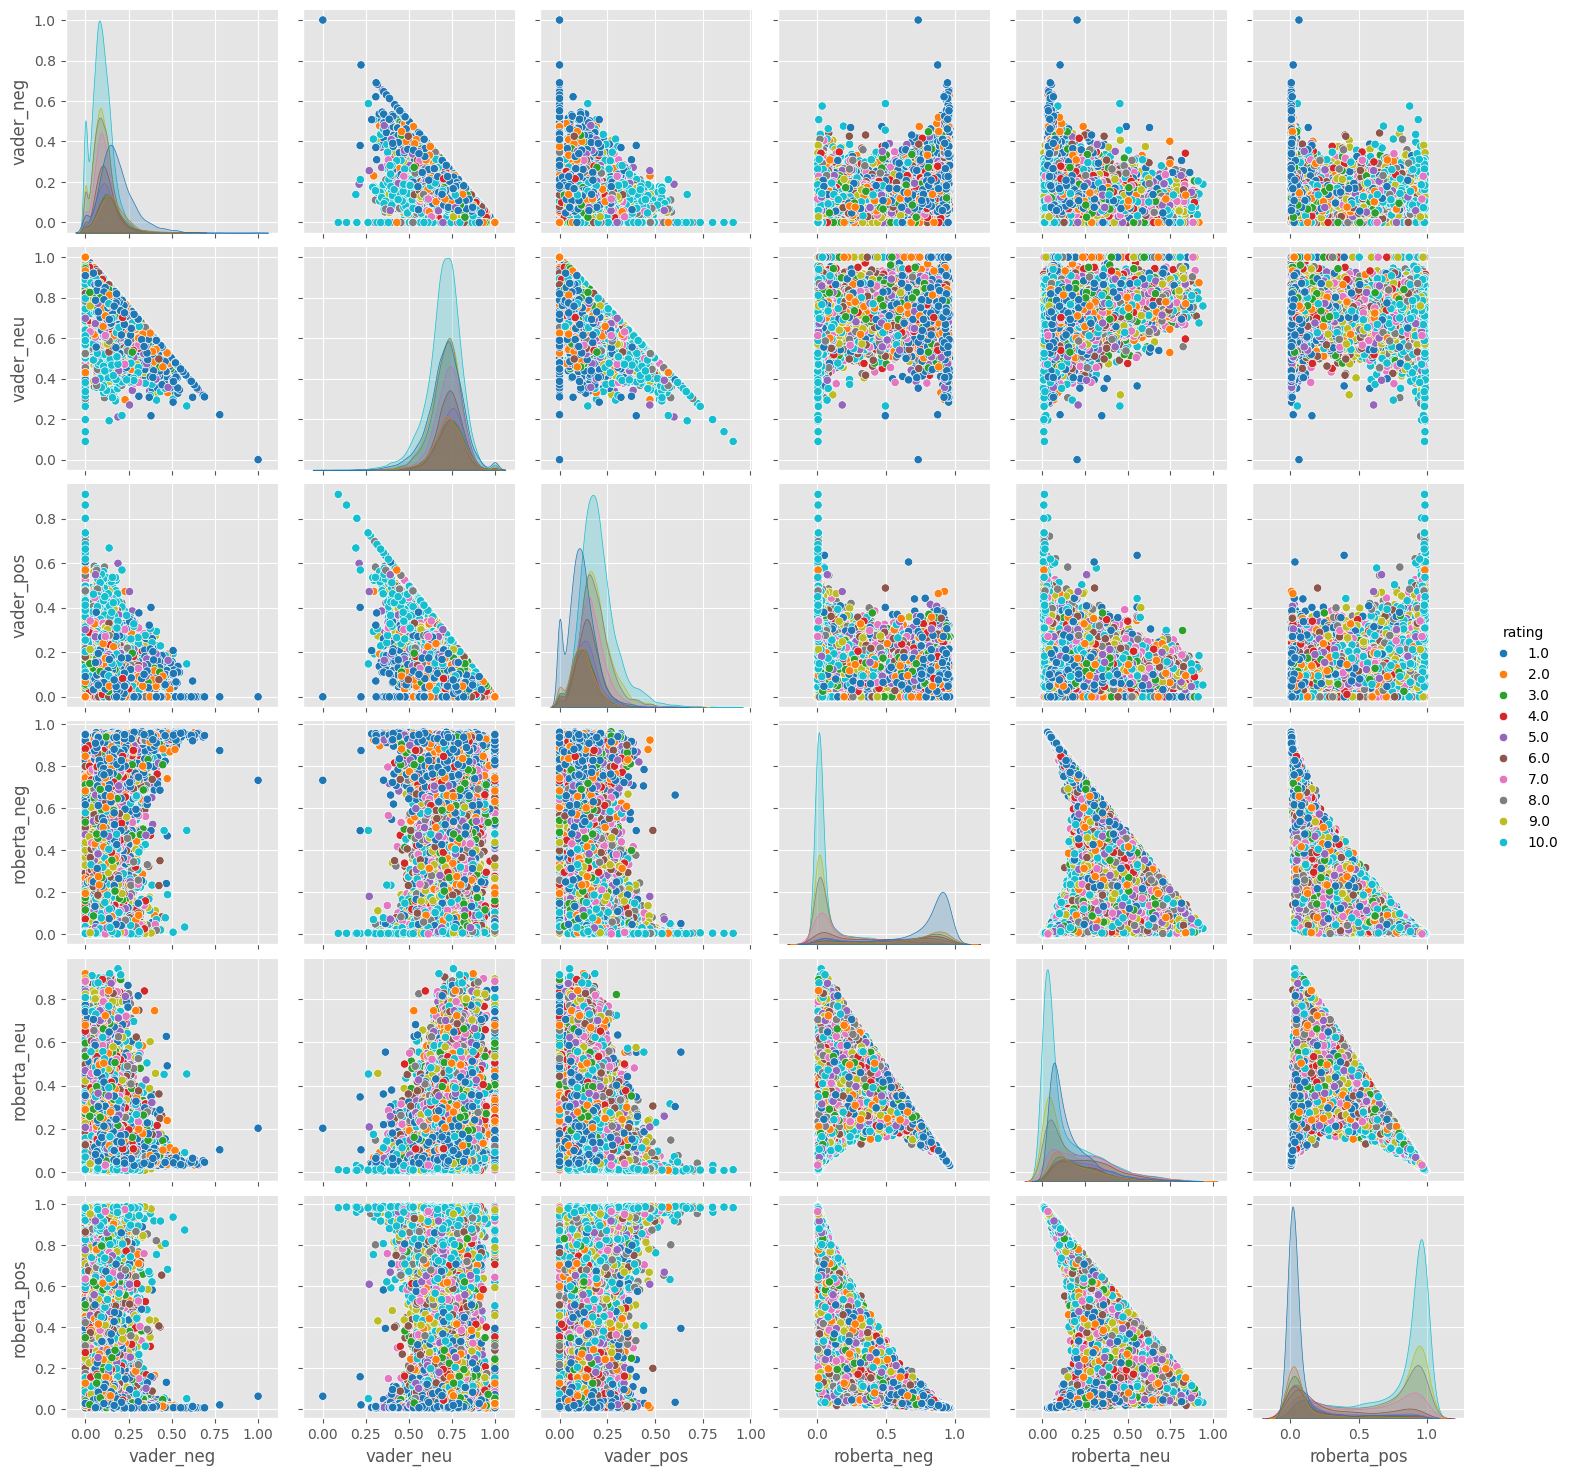

In [120]:
sns.pairplot(data=StarWars,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

## Klassifizierung

In [121]:
ausreiser = StarWars[['titel','gesamtbewertung','rating','textblob_polaritaet', 'textblob_subjektivitaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg', 'roberta_neu','roberta_pos','bewertung']]
ausreiser.head(3)

titel  gesamtbewertung  rating  \
0  Star Wars: Ewoks - Kampf um Endor              5.4     2.0   
1  Star Wars: Ewoks - Kampf um Endor              5.4     7.0   
2  Star Wars: Ewoks - Kampf um Endor              5.4     5.0   

   textblob_polaritaet  textblob_subjektivitaet  vader_neg  vader_neu  \
0            -0.005000                 0.472222      0.092      0.848   
1             0.065385                 0.510256      0.086      0.754   
2             0.148846                 0.518043      0.139      0.698   

   vader_pos  vader_compound  roberta_neg  roberta_neu  roberta_pos  \
0      0.060         -0.4964     0.613927     0.311481     0.074592   
1      0.161          0.8809     0.025831     0.138740     0.835430   
2      0.163          0.5923     0.676146     0.277843     0.046011   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     bewertung  
0  The title basically sums up everything you need to know about this movie. If low-quality generic fantasy flicks are your guilty pleasure, then you can give it a watch. However, if you're a Star Wars, sci-fi or action movie fans, then you can pretty much forget that this movie exists. There's nothing of value for you here. It's not part of the Star Wars canon (yes, even the expanded universe), the sci-fi elements are almost not present and the action quality is very bad. It's just another project created solely for the purpose of making more money.The only reason why I'm giving it a 2 instead of 1 is because at least this movie is somewhat watchable. But don't expect anything more than that.  
1          Somehow I missed this back in my childhood, which is bizarre because I've been a huge sword & sorcery and sci-fi fan for as long as I can remember.I watched this film for the first time today. I thought it was really good. Not perfect, of course, but much better than merely watchable. In fact, I would place this alongside many of the 1980s fantasy greats.If you like films like Labyrinth, Willow, Time Bandits, Dark Crystal, The Princess Bride, etc. Then I'd be shocked if you didn't also like Ewoks: Battle for Endor.It wasn't until I came to IMDB that I discovered that this is actually a sequel to another Ewoks movie that I hadn't heard of, so now my evening viewing is sorted as well!  
2       I'm currently in the process of trying to "complete Star Wars".I honestly didn't enjoy it but I'm giving it 5* because it's very clearly a kids film and I'm obviously not the target audience. The Ewok is the only single Star Wars reference in the entire film so it's almost hard to even label this as part of the Star Wars franchise. It's almost as if it's an independent film in its own right (which would have been fine) and they just stuck the Star Wars name on it to boost viewing figures.For a young audience, it's absolutely fine. The little girl who plays the main character is actually really good in her role so props to her.For a 30 year old male however, this is a pretty hard watch.

### Klassifizierung pos / negativ

In [125]:
def pos_neg(value):
    if value < 0.00:
        return 'Negativ'
    else:
        return 'Positiv' 
ausreiser['pos_neg_textblob'] = ausreiser['textblob_polaritaet'].apply(pos_neg)
ausreiser['pos_neg_vader_comp'] = ausreiser['vader_compound'].apply(pos_neg)
ausreiser['pos_neg_textblob'] = ausreiser['textblob_polaritaet'].apply(pos_neg)

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_10036\3668505179.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_10036\3668505179.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_10036\3668505179.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [131]:
#TextBlob
true_pos_textblob = 0
true_neg_textblob = 0
false_pos_textblob = 0
false_neg_textblob = 0

for index, row in ausreiser.iterrows():
    #actual Val = Positiv & predicted = Positiv
    if row['rating'] > 5 and row['pos_neg_textblob'] == 'Positiv':
        true_pos_textblob += 1
    #actual Val = Pos & predicted = negativ
    elif row['rating'] > 5 and row['pos_neg_textblob'] == 'Negativ':
        false_neg_textblob += 1
    #actual val = negativ & predicted = Positiv
    elif row['rating'] <= 4 and row['pos_neg_textblob'] == 'Positiv':
        false_pos_textblob += 1
    else:
    #actual val = negativ & predicted = negativ
        true_neg_textblob += 1

# pos_row = [true_pos_textblob, false_pos_textblob]
# neg_row = [true_neg_textblob, false_neg_textblob]


true_pos_vader_comp = 0
true_neg_vader_comp = 0
false_pos_vader_comp = 0
false_neg_vader_comp = 0

for index, row in ausreiser.iterrows():
    if row['rating'] > 5 and row['pos_neg_vader_comp'] == 'Positiv':
        true_pos_vader_comp += 1
    elif row['rating'] > 5 and row['pos_neg_vader_comp'] == 'Negativ':
        false_neg_vader_comp += 1
    elif row['rating'] <= 4 and row['pos_neg_vader_comp'] == 'Positiv':
        false_pos_vader_comp += 1
    else:
        true_neg_vader_comp += 1


# print(pos_row)
# print(neg_row)
# Confusion MAtrix gesamt
conf_matrix = np.array([[true_pos_textblob, false_pos_textblob, true_pos_vader_comp, false_pos_vader_comp],
                        [false_neg_textblob, true_neg_textblob, false_neg_vader_comp, true_neg_vader_comp]])


conf_matrix_textblob = np.array([[true_pos_textblob, false_pos_textblob],
                        [false_neg_textblob, true_neg_textblob]])

conf_matrix_vader = np.array([[true_pos_vader_comp, false_pos_vader_comp],
                        [ false_neg_vader_comp, true_neg_vader_comp]])

print("Confusion Matrix Gesamt:")
print(conf_matrix)

print("Confusion Matrix Textblob:")
print(conf_matrix_textblob)

print("Confusion Matrix Vader:")
print(conf_matrix_vader)


Confusion Matrix Gesamt:
[[17553  4768 14857  3038]
 [ 1037  5240  3733  6970]]
Confusion Matrix Textblob:
[[17553  4768]
 [ 1037  5240]]
Confusion Matrix Vader:
[[14857  3038]
 [ 3733  6970]]


#### Confusion Matrix Vader

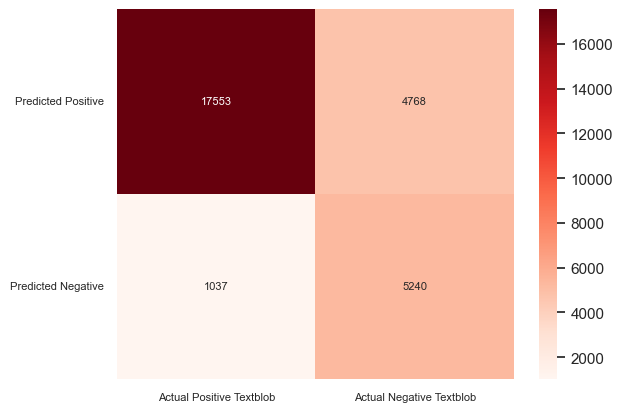

In [127]:
# Creating a DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_matrix_textblob, index=['Predicted Positive', 'Predicted Negative'], 
                     columns=['Actual Positive Textblob', 'Actual Negative Textblob'])

# Setting the font scale
sns.set(font_scale=1.0)  # Adjust the font scale as needed

# Plotting the heatmap
heatmap = sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt='.0f', cmap='Reds')

# Adjusting the rotation and font size of the labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)

plt.show()

In [128]:
conf_matrix_vader

array([[14857,  3038],
       [ 3733,  6970]])

In [132]:
total_samples = np.sum(conf_matrix_vader)
percentages = (conf_matrix_vader / total_samples) * 100
percentages_str = np.around(percentages, decimals=2).astype(str)
percentages_with_percent_sign = np.core.defchararray.add(percentages_str, '%')
df_percentages = pd.DataFrame(percentages_with_percent_sign, 
                              index=['Positive', 'Negative'], 
                              columns=['Positive', 'Negative'])

df_percentages



Positive Negative
Positive   51.95%   10.62%
Negative   13.05%   24.37%

In [130]:
# # Plot the confusion matrix using Plotly Express
# fig = go.Figure(data=go.Heatmap(z=percentages,
#                                 x=df_percentages.index,
#                                 y=df_percentages.columns,
#                                 colorscale='Reds',  # Red color scale
#                                 zmin=0,  # Minimum value for the color scale
#                                 zmax=100))  # Maximum value for the color scale

# # Add annotations to the heatmap
# for i in range(len(df_percentages.index)):
#     for j in range(len(df_percentages.columns)):
#         fig.add_annotation(text=percentages_with_percent_sign[i, j],
#                            x=df_percentages.columns[j],
#                            y=df_percentages.index[i],
#                            showarrow=False,
#                            font=dict(color='black', size=12),
#                            xref="x",
#                            yref="y")

# # Update layout to set height and width and make the quarters quadratic
# fig.update_layout(title='Confusion Matrix - VADER',
#                   xaxis_title='Actual Label',
#                   yaxis_title='Predicted Label',
#                   height=600,  # Set height of the plot
#                   width=600)   # Set width of the plot

# # Show the plot
# fig.show()


In [ ]:
data = {
    'Positive': [51.95, 10.62],
    'Negative': [13.05, 24.37]
}
index = ['Positive', 'Negative']
df_percentages = pd.DataFrame(data, index=index)

df_percentages = df_percentages.replace('%', '', regex=True).astype(float)

fig = px.imshow(df_percentages,
                labels=dict(x="Actual Label", y="Predicted Label", color="Percentage"),
                x=df_percentages.columns,
                y=df_percentages.index,
                color_continuous_scale='Reds')


for i in range(len(df_percentages.index)):
    for j in range(len(df_percentages.columns)):
        fig.add_annotation(text=f"{df_percentages.iloc[i, j]:.1f}%", 
                           x=df_percentages.columns[j],
                           y=df_percentages.index[i],
                           showarrow=False,
                           font=dict(color='black', size=12),  
                           xref="x",
                           yref="y")


fig.update_layout(title='VADER Confusion Matrix (n = 28.598)',
                  xaxis_title='Actual Label',
                  yaxis_title='Predicted Label',
                  height=500, 
                  width=700,
                  title_font_size=20,
                  title_x = 0.5,
                  xaxis=dict(title_font=dict(size=18)),
                  yaxis=dict(title_font=dict(size=18))
)

fig.update_coloraxes(colorbar_title= 'Anteil in %')

fig.show()



#### Confusion Matrix Textblob

In [133]:
conf_matrix_textblob

array([[17553,  4768],
       [ 1037,  5240]])

In [134]:
total_samples = np.sum(conf_matrix_textblob)
percentages_textblob = (conf_matrix_textblob / total_samples) * 100
percentages_str_textblob = np.around(percentages_textblob, decimals=2).astype(str)
percentages_with_percent_sign_textblob = np.core.defchararray.add(percentages_str_textblob, '%')
df_percentages_textblob = pd.DataFrame(percentages_with_percent_sign_textblob, 
                              index=['Positive', 'Negative'], 
                              columns=['Positive', 'Negative'])

df_percentages_textblob


Positive Negative
Positive   61.38%   16.67%
Negative    3.63%   18.32%

In [139]:
data = {
    'Positive': [61.38, 16.67],
    'Negative': [3.63, 18.32]
}
index = ['Positive', 'Negative']
df_percentages_textblob = pd.DataFrame(data, index=index)

df_percentages_textblob = df_percentages_textblob.replace('%', '', regex=True).astype(float)

fig = px.imshow(df_percentages_textblob,
                labels=dict(x="Actual Label", y="Predicted Label", color="Percentage"),
                x=df_percentages_textblob.columns,
                y=df_percentages_textblob.index,
                color_continuous_scale='Reds')


for i in range(len(df_percentages_textblob.index)):
    for j in range(len(df_percentages_textblob.columns)):
        fig.add_annotation(text=f"{df_percentages_textblob.iloc[i, j]:.1f}%", 
                           x=df_percentages_textblob.columns[j],
                           y=df_percentages_textblob.index[i],
                           showarrow=False,
                           font=dict(color='black', size=12),  
                           xref="x",
                           yref="y")


fig.update_layout(title='Textblob Polarität Confusion Matrix (n = 28.598)',
                  xaxis_title='Actual Label',
                  yaxis_title='Predicted Label',
                  height=500, 
                  width=700,
                  title_font_size=20,
                  title_x = 0.5,
                  xaxis=dict(title_font=dict(size=18)),
                  yaxis=dict(title_font=dict(size=18))
)

fig.update_coloraxes(colorbar_title= 'Anteil in %')

fig.show()



## Accuracy Textblob & Vader

In [ ]:
#Textblob
print(conf_matrix_textblob)

[[17553  4768]
 [ 1037  5240]]


In [ ]:
conf_matrix_textblob[1][0]

1037

In [ ]:
sum(sum(conf_matrix_textblob))

28598

In [ ]:
accuracy_textblob = ((conf_matrix_textblob[0][0]+conf_matrix_textblob[1][1]) / sum(sum(conf_matrix_textblob))*100)
recall_textblob = (conf_matrix_textblob[0][0] /(conf_matrix_textblob[0][0]+conf_matrix_textblob[1][0])*100)
precision_textblob = (conf_matrix_textblob[0][0] /(conf_matrix_textblob[0][0]+conf_matrix_textblob[0][1])*100)

accuracy_vader = ((conf_matrix_vader[0][0]+conf_matrix_vader[1][1]) / sum(sum(conf_matrix_vader))*100)
recall_vader = (conf_matrix_vader[0][0] /(conf_matrix_vader[0][0]+conf_matrix_vader[1][0])*100)
precision_vader = (conf_matrix_vader[0][0] /(conf_matrix_vader[0][0]+conf_matrix_vader[0][1])*100)


print(f"Die Accuracy des Textblob Algorithmus beträgt: {accuracy_textblob:.1f}%")
print(f"Der Recall des Textblob Algorithmus beträgt: {recall_textblob:.1f}%")
print(f"Die Precision des Textblob Algorithmus beträgt: {precision_textblob:.1f}%")

print("--------------------------------------------------------------------")
print(f"Die Accuracy des Vader Algorithmus beträgt: {accuracy_vader:.1f}%")
print(f"Der Recall des Vader Algorithmus beträgt: {recall_vader:.1f}%")
print(f"Die Precision des Vader Algorithmus beträgt: {precision_vader:.1f}%")

result_table = pd.DataFrame(data = [['Textblob',accuracy_textblob, recall_textblob, precision_textblob], ['Vader',accuracy_vader, recall_vader, precision_vader]], columns=['Methode', 'Accuracy','Recall','Precision'])
result_table[['Accuracy', 'Recall', 'Precision']] = result_table[['Accuracy', 'Recall', 'Precision']].map(lambda x: f"{x:.0f}%")

result_table

Die Accuracy des Textblob Algorithmus beträgt: 79.7%
Der Recall des Textblob Algorithmus beträgt: 94.4%
Die Precision des Textblob Algorithmus beträgt: 78.6%
--------------------------------------------------------------------
Die Accuracy des Vader Algorithmus beträgt: 76.3%
Der Recall des Vader Algorithmus beträgt: 79.9%
Die Precision des Vader Algorithmus beträgt: 83.0%


Methode Accuracy Recall Precision
0  Textblob      80%    94%       79%
1     Vader      76%    80%       83%

## Unterschied Durschnitt Rating Film & Gesamtbewertung aus IMDB (aufgrund fehlenden Rezessionen mit Wortlauten)

In [ ]:
df_gesamtbewertung = pd.DataFrame(StarWars.groupby('titel')['rating'].mean())
df_gesamtbewertung
df_gesamtbewertung_titel = StarWars[['film_id','jahr','titel','gesamtbewertung']].drop_duplicates()
df_gesamtbewertung = df_gesamtbewertung.merge(df_gesamtbewertung_titel, on='titel', how='inner')
df_gesamtbewertung['rating_gesamtbewertung'] = df_gesamtbewertung['rating'] - df_gesamtbewertung['gesamtbewertung']
df_gesamtbewertung.drop_duplicates(['titel'], inplace=True)
df_gesamtbewertung = df_gesamtbewertung.sort_values('jahr', ascending=False)
df_gesamtbewertung


titel    rating     film_id  \
14                    Star Wars: Geschichten der Jedi  8.685393  tt20723374   
20                                 Star Wars: Visions  5.947644  tt13622982   
17                           Star Wars: The Bad Batch  6.800000  tt12708542   
7     Star Wars: Episode IX - Der Aufstieg Skywalkers  5.944756   tt2527338   
0                             Solo: A Star Wars Story  7.187266   tt3778644   
15                              Star Wars: Resistance  4.449102   tt8336340   
11         Star Wars: Episode VIII - Die letzten Jedi  4.108159   tt2527336   
16                               Star Wars: Rogue One  7.370518   tt3748528   
10    Star Wars: Episode VII - Das Erwachen der Macht  6.133524   tt2488496   
1                                    Star Wars Rebels  6.872727   tt2930604   
18                          Star Wars: The Clone Wars  7.518164   tt0458290   
5         Star Wars: Episode III - Die Rache der Sith  7.444243   tt0121766   
2                               Star Wars: Clone Wars  7.588235   tt0361243   
4     Star Wars: Episode II - Angriff der Klonkrieger  6.653438   tt0121765   
3         Star Wars: Episode I - Die dunkle Bedrohung  6.596479   tt0120915   
12                  Star Wars: Ewoks - Kampf um Endor  5.950000   tt0089110   
13           Star Wars: Ewoks - Karawane der Tapferen  6.783784   tt0087225   
9   Star Wars: Episode VI - Die Rückkehr der Jedi-...  8.105178   tt0086190   
8   Star Wars: Episode V - Das Imperium schlägt zu...  9.244221   tt0080684   
21                      The Star Wars Holiday Special  3.452830   tt0193524   
6            Star Wars: Episode IV - Krieg der Sterne  8.713555   tt0076759   

    jahr  gesamtbewertung  rating_gesamtbewertung  
14  2022              8.2                0.485393  
20  2021              7.0               -1.052356  
17  2021              7.8               -1.000000  
7   2019              6.4               -0.455244  
0   2018              6.9                0.287266  
15  2018              5.3               -0.850898  
11  2017              6.9               -2.791841  
16  2016              7.8               -0.429482  
10  2015              7.8               -1.666476  
1   2014              8.1               -1.227273  
18  2008              5.9                1.618164  
5   2005              7.6               -0.155757  
2   2003              7.8               -0.211765  
4   2002              6.6                0.053438  
3   1999              6.5                0.096479  
12  1985              5.4                0.550000  
13  1984              5.3                1.483784  
9   1983              8.3               -0.194822  
8   1980              8.7                0.544221  
21  1978              2.2                1.252830  
6   1977              8.6                0.113555

In [ ]:
fig = px.bar(df_gesamtbewertung, x='titel', y=['rating', 'gesamtbewertung'], barmode='group')
fig.update_layout(
    xaxis_title='Filmtitel',
    yaxis_title='Rating',
    legend_title='Legende',
    title='Differenz Bewertungen',
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5,
    font=dict(
        size=14
    )
)

fig.update_traces(
    name='Rating',
    selector=dict(type='bar', name='rating')  # Update the name for the 'rating' trace
)
fig.update_traces(
    name='Gesamtbewertung',
    selector=dict(type='bar', name='gesamtbewertung')  # Update the name for the 'gesamtbewertung' trace
)
dark_red_colors = ['#4A1000', '#8E2000']
for i, trace in enumerate(fig.data):
    trace.marker.color = dark_red_colors[i]

fig.show()

## Betrachtung Ausreißer

### Größte Differenzen Rating & Sentiment

In [ ]:
StarWars.groupby('titel')['gesamtbewertung'].value_counts()

titel                                                 gesamtbewertung
Solo: A Star Wars Story                               6.9                2136
Star Wars Rebels                                      8.1                 165
Star Wars: Clone Wars                                 7.8                  51
Star Wars: Episode I - Die dunkle Bedrohung           6.5                2783
Star Wars: Episode II - Angriff der Klonkrieger       6.6                2545
Star Wars: Episode III - Die Rache der Sith           7.6                2206
Star Wars: Episode IV - Krieg der Sterne              8.6                1564
Star Wars: Episode IX - Der Aufstieg Skywalkers       6.4                6064
Star Wars: Episode V - Das Imperium schlägt zurück    8.7                 995
Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter  8.3                 618
Star Wars: Episode VII - Das Erwachen der Macht       7.8                2449
Star Wars: Episode VIII - Die letzten Jedi            6.9               

In [ ]:
df_rating_roberta_pos = StarWars.query("rating == 1 & roberta_pos >= 0.9").sort_values("roberta_pos", ascending=False)
len(df_rating_roberta_pos)

44